In [51]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("mental_disorders_reddit.csv")

In [3]:
df

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
...,...,...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,1396298261,False,mentalillness
701783,I am rooster illusion,AMA,1344639905,False,mentalillness
701784,I look again to make sure so one is near me an...,NaN,1353891546,False,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,1348724331,False,mentalillness


In [4]:
df.drop("created_utc", axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

title        0
selftext     0
over_18      0
subreddit    0
dtype: int64

In [6]:
df = df[df["selftext"] != "[removed]"] # Filtering unusable data

In [7]:
df

,title,selftext,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",False,BPD
...,...,...,...,...
701779,I really need to talk to a therapist..,I can't afford a real session and it's 11 PM. ...,False,mentalillness
701781,I have pica,Hello. \n I'm taking steps to get rid ...,False,mentalillness
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,False,mentalillness
701783,I am rooster illusion,AMA,False,mentalillness


In [8]:
df.subreddit.unique()

array(['BPD', 'bipolar', 'depression', 'Anxiety', 'schizophrenia',
       'mentalillness'], dtype=object)

In [9]:
stopWords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Tokenization, Removing stop words and lemmatization all under following function.

In [10]:
def nlpTextProcessor(sentence):
    tokenizedSent = word_tokenize(sentence)
    removedStopwords = [word for word in tokenizedSent if word not in stopWords]
    finalOutput = []
    tempOutput = []
    for word in removedStopwords:
        if word not in set("``{['?/]}().,:-") and word not in ["''"]:
            tempOutput.append(lemmatizer.lemmatize(word))
    finalOutput = " ".join(tempOutput)
    return finalOutput

Text(0.5, 1.0, 'Value counts plot')

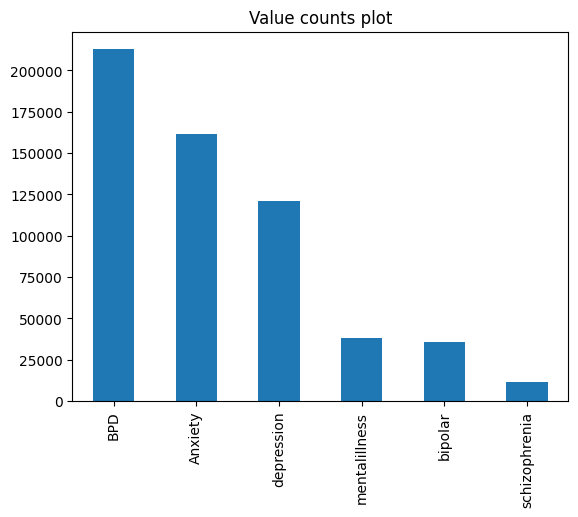

In [52]:
df.subreddit.value_counts().plot(kind="bar")
plt.title("Value counts plot")

In [12]:
df.subreddit.value_counts()

BPD              212826
Anxiety          161629
depression       121202
mentalillness     38161
bipolar           35672
schizophrenia     11727
Name: subreddit, dtype: int64

In [ ]:
# Grabbing the least occurring value to balance out the classes in the data set for better pattern recognition

In [13]:
int((len(df[df["subreddit"] == "schizophrenia"]) / 100 ) * 5)

586

In [14]:
balancedDf = df[df["subreddit"] == "schizophrenia"].sample(586)

In [15]:
for label in ["BPD", "Anxiety", "depression", "mentalillness", "bipolar"]:
    currDf = df[df["subreddit"] == f"{label}"]
    currDf = currDf.sample(int((len(currDf) / 100 ) * 5))
    balancedDf = pd.concat([balancedDf, currDf], ignore_index=True, axis=0)


In [16]:
balancedDf = balancedDf.sample(frac=1).reset_index(drop=True)

In [17]:
balancedDf # Balanced classes data frame 

,title,selftext,over_18,subreddit
0,Psychologist moving me to another team,"I have bad anxiety, agoraphobia and depression...",False,Anxiety
1,I cheated.,I have a relationship with a person that are a...,False,BPD
2,Has your anxiety caused you to do something yo...,"Like, has it made you cheat? Or do something y...",False,Anxiety
3,I’m tired of how quickly my emotions cycle,I worked 6 hours of overtime yesterday. I did ...,False,BPD
4,I was finally honest and nothing changed,I (17f) have been going through what I cons...,False,depression
...,...,...,...,...
29054,Should I (32F) Choose a Male or Female Doctor ...,Trigger Warning: certain medications described...,False,Anxiety
29055,i want a purpose,Theres never been a point in my life where I’v...,False,depression
29056,Social Media,What does your social media look like when man...,False,bipolar
29057,Weird eye movement before/during panic.,I’ve been having this symptom of anxiety for y...,False,Anxiety


In [18]:
balancedDf["selftext"] = balancedDf["selftext"].apply(nlpTextProcessor)

In [19]:
balancedDf.columns = ["title", "text", "adult", "label"]

In [20]:
balancedDf

,title,text,adult,label
0,Psychologist moving me to another team,I bad anxiety agoraphobia depression psycholog...,False,Anxiety
1,I cheated.,I relationship person afraid intimicy sometime...,False,BPD
2,Has your anxiety caused you to do something yo...,Like made cheat Or something normally would n'...,False,Anxiety
3,I’m tired of how quickly my emotions cycle,I worked 6 hour overtime yesterday I school wo...,False,BPD
4,I was finally honest and nothing changed,I 17f going I consider pretty heavy depression...,False,depression
...,...,...,...,...
29054,Should I (32F) Choose a Male or Female Doctor ...,Trigger Warning certain medication described T...,False,Anxiety
29055,i want a purpose,Theres never point life I ’ ever encouraged hy...,False,depression
29056,Social Media,What social medium look like manic Do tell eve...,False,bipolar
29057,Weird eye movement before/during panic.,I ’ symptom anxiety year I ’ wondering common ...,False,Anxiety


Text(0.5, 1.0, 'Individuals Age > 18')

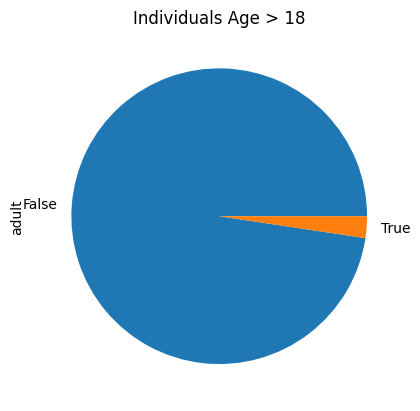

In [21]:
balancedDf["adult"].value_counts().plot(kind="pie")
plt.title("Individuals Age > 18")

Text(0.5, 1.0, 'Common Issues in Youngsters')

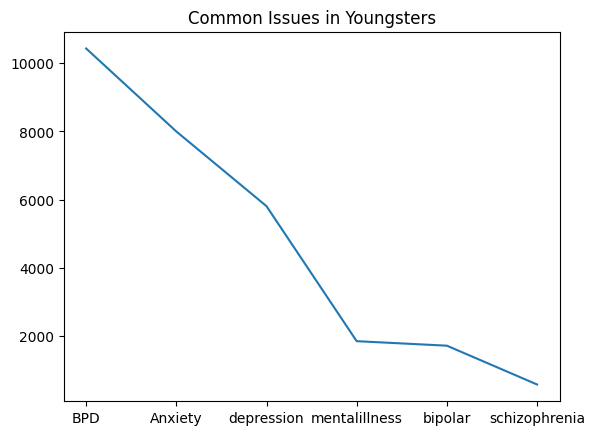

In [22]:
balancedDf[balancedDf["adult"] == False].label.value_counts().plot(kind="line")
plt.title("Common Issues in Youngsters")

Text(0.5, 1.0, 'Common Issues in Older People')

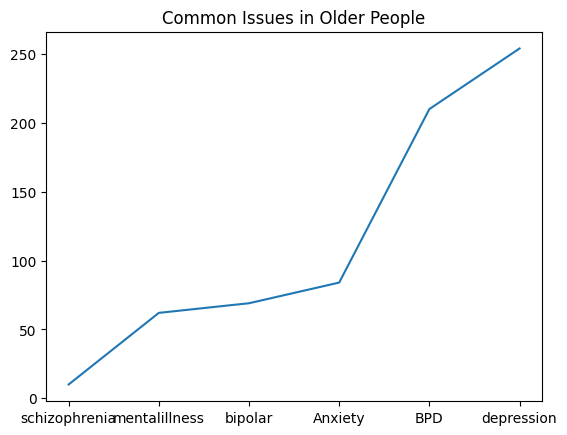

In [23]:
balancedDf[balancedDf["adult"] == True].label.value_counts().sort_values().plot(kind="line")
plt.title("Common Issues in Older People")

In [24]:
balancedDf["title"] = balancedDf["title"].apply(lambda x: str(x).lower())
balancedDf["text"] = balancedDf["text"].apply(lambda x: str(x).lower())

In [25]:
X = balancedDf.drop("label", axis=1)
y = balancedDf["label"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
countVectorizer = CountVectorizer(ngram_range=(1,1))
trainData = countVectorizer.fit_transform(X_train["text"])

In [28]:
print(countVectorizer.get_feature_names_out())

['00' '000' '0000' ... '𝘆𝗼𝘂𝗿' '𝘬𝘯𝘰𝘸' '𝙡𝙞𝙩𝙚𝙧𝙖𝙡𝙡𝙮']


In [ ]:
# Using multi nomial naive bayes model for nlp.

In [29]:
model = MultinomialNB()
model.fit(trainData, y_train)

MultinomialNB()

In [30]:
testData = countVectorizer.transform(X_test["text"])

In [31]:
predData = model.predict(testData)

In [32]:
len(predData)

5812

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, predData))

               precision    recall  f1-score   support

      Anxiety       0.73      0.76      0.75      1664
          BPD       0.67      0.82      0.74      2043
      bipolar       0.64      0.33      0.43       363
   depression       0.64      0.66      0.65      1237
mentalillness       0.30      0.08      0.13       390
schizophrenia       0.45      0.08      0.13       115

     accuracy                           0.67      5812
    macro avg       0.57      0.45      0.47      5812
 weighted avg       0.65      0.67      0.65      5812



In [ ]:
# Using grid search cv to hyper tune the parameter.

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param = {"alpha": [0.0001, 0.01, 0.1, 1, 10, 20, 100], "fit_prior": [True, False]}

In [37]:
grid = GridSearchCV(MultinomialNB(), param_grid=param, verbose=0)

In [38]:
grid.fit(trainData, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.01, 0.1, 1, 10, 20, 100],
                         'fit_prior': [True, False]})

In [39]:
grid.best_estimator_

MultinomialNB(alpha=1, fit_prior=False)

In [40]:
predGrid = grid.predict(testData)

In [41]:
print(classification_report(y_test, predGrid))

               precision    recall  f1-score   support

      Anxiety       0.74      0.76      0.75      1664
          BPD       0.70      0.79      0.74      2043
      bipolar       0.58      0.39      0.47       363
   depression       0.63      0.70      0.66      1237
mentalillness       0.27      0.13      0.17       390
schizophrenia       0.39      0.10      0.15       115

     accuracy                           0.68      5812
    macro avg       0.55      0.48      0.49      5812
 weighted avg       0.66      0.68      0.66      5812



In [ ]:
# Viewing actual and predicted values side by side.

In [42]:
pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(predData).reindex()], axis=1, ignore_index=True)

,0,1
0,depression,depression
1,depression,depression
2,BPD,BPD
3,BPD,BPD
4,BPD,BPD
...,...,...
5807,mentalillness,BPD
5808,bipolar,BPD
5809,bipolar,bipolar
5810,BPD,BPD


In [ ]:
# Defining a function that takes in a text and predicts with the help of model.

In [43]:
def diagnose(text):
    textData = countVectorizer.transform([text])

    print(grid.predict(textData))
    classes = ['Anxiety', 'BPD', 'bipolar', 'depression', 'mentalillness',
       'schizophrenia']
    pd.DataFrame(grid.predict_proba(textData) * 100, columns=classes).plot(kind="bar")
    print(pd.DataFrame(grid.predict_proba(textData) * 100, columns=classes))

    

In [49]:
text = """Behavioural: antisocial behaviour, compulsive behaviour, hostility, impulsivity, irritability, risk-taking behaviours, self-destructive behaviour, self-harm, social isolation, or lack of restraint
Mood: anger, anxiety, general discontent, guilt, loneliness, mood swings, or sadness
Psychological: depression, distorted self-image, grandiosity, or narcissism
Also common: thoughts of suicide"""

['bipolar']
        Anxiety        BPD    bipolar    depression  mentalillness  \
0  4.439077e-09  15.792037  84.164128  1.725624e-07       0.043835   

   schizophrenia  
0   2.398540e-10  


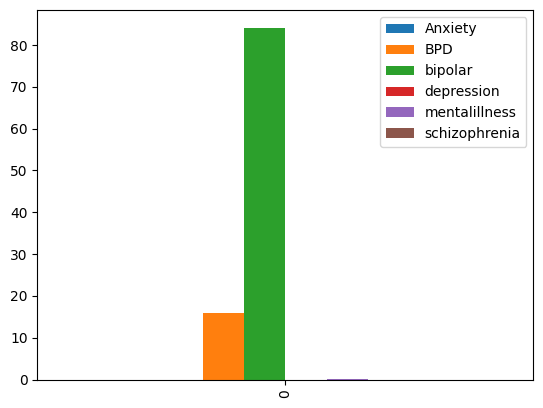

In [50]:
diagnose(text)

In [46]:
################################################################################################